# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Loading the labels

In [4]:
train_labels = pd.read_csv("image_labels_train.csv")
test_labels = pd.read_csv("image_labels_test.csv")

# Data Analysis

## Train labels


In [5]:
# Display first five rows
train_labels.head()

,image_id,rad_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
0,000434271f63a053c4128a0ba6352c7f,R2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,000434271f63a053c4128a0ba6352c7f,R3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,000434271f63a053c4128a0ba6352c7f,R6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00053190460d56c53cc3e57321387478,R11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,00053190460d56c53cc3e57321387478,R2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Display last five rows
train_labels.tail()

,image_id,rad_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
44995,fff0f82159f9083f3dd1f8967fc54f6a,R8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44996,fff0f82159f9083f3dd1f8967fc54f6a,R9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44997,fff2025e3c1d6970a8a6ee0404ac6940,R1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44998,fff2025e3c1d6970a8a6ee0404ac6940,R2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44999,fff2025e3c1d6970a8a6ee0404ac6940,R5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_id            45000 non-null  object
 1   rad_id              45000 non-null  object
 2   Aortic enlargement  45000 non-null  int64 
 3   Atelectasis         45000 non-null  int64 
 4   Calcification       45000 non-null  int64 
 5   Cardiomegaly        45000 non-null  int64 
 6   Clavicle fracture   45000 non-null  int64 
 7   Consolidation       45000 non-null  int64 
 8   Edema               45000 non-null  int64 
 9   Emphysema           45000 non-null  int64 
 10  Enlarged PA         45000 non-null  int64 
 11  ILD                 45000 non-null  int64 
 12  Infiltration        45000 non-null  int64 
 13  Lung Opacity        45000 non-null  int64 
 14  Lung cavity         45000 non-null  int64 
 15  Lung cyst           45000 non-null  int64 
 16  Mediastinal shift   45

In [8]:
train_labels.shape

(45000, 30)

## Test labels

In [9]:
# Display first five rows
test_labels.head()

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other disease,No finding
0,e0dc2e79105ad93532484e956ef8a71a,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,0aed23e64ebdea798486056b4f174424,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,aa15cfcfca7605465ca0513902738b95,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,665c4a6d2693dc0286d65ab479c9b169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,42da2c134b53cb5594774d3d29faac59,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


There are 29 columns in test_label dataset because it does not have rad_id column.

In [10]:
# Display last five rows
test_labels.tail()

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other disease,No finding
2995,a039af299f86007d0d77da077a6def9a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2996,aba3d1f5b1c04236f52a8980929b2cfa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2997,6d3d6b53f358a983b486e9e03144eb62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2998,d6678cb7ae39f575d35ab9da6d7cb171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2999,e82d33dfd04d95c61d8d133dcbf29691,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_id            3000 non-null   object
 1   Aortic enlargement  3000 non-null   int64 
 2   Atelectasis         3000 non-null   int64 
 3   Calcification       3000 non-null   int64 
 4   Cardiomegaly        3000 non-null   int64 
 5   Clavicle fracture   3000 non-null   int64 
 6   Consolidation       3000 non-null   int64 
 7   Edema               3000 non-null   int64 
 8   Emphysema           3000 non-null   int64 
 9   Enlarged PA         3000 non-null   int64 
 10  ILD                 3000 non-null   int64 
 11  Infiltration        3000 non-null   int64 
 12  Lung Opacity        3000 non-null   int64 
 13  Lung cavity         3000 non-null   int64 
 14  Lung cyst           3000 non-null   int64 
 15  Mediastinal shift   3000 non-null   int64 
 16  Nodule/Mass         3000

In [12]:
test_labels.shape

(3000, 29)

## EDA


The following piece of code is showing that the different radiologists classify each x-ray to a different disease. Even in some cases one x ray is classified to multiple diseases by one radiologist.

In [13]:
# Define target columns
target_columns = ["COPD", "Lung tumor", "Pneumonia", "Tuberculosis", "Other diseases", "No finding"]

In [18]:
# Group by 'image_id' and sum the target columns
grouped = train_labels.groupby("image_id")[target_columns].sum()
grouped

,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
image_id,,,,,,
000434271f63a053c4128a0ba6352c7f,0,0,0,0,0,3
00053190460d56c53cc3e57321387478,0,0,0,0,0,3
0005e8e3701dfb1dd93d53e2ff537b6e,0,2,3,2,0,0
0006e0a85696f6bb578e84fafa9a5607,0,0,0,0,0,3
0007d316f756b3fa0baea2ff514ce945,0,0,0,0,3,0
...,...,...,...,...,...,...
ffe6f9fe648a7ec29a50feb92d6c15a4,0,0,0,0,3,0
ffea246f04196af602c7dc123e5e48fc,0,0,0,0,0,3
ffeffc54594debf3716d6fcd2402a99f,0,0,0,0,3,0


In [15]:
# Identify rows where more than one target column has values greater than 0
rows_with_multiple_nonzero = grouped[grouped.gt(0).sum(axis=1) > 1]

In [16]:
# Reset index to make 'image_id' a separate column
rows_with_multiple_nonzero = rows_with_multiple_nonzero.reset_index()

In [17]:
# Display the resulting dataset
rows_with_multiple_nonzero.head()

,image_id,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
0,0005e8e3701dfb1dd93d53e2ff537b6e,0,2,3,2,0,0
1,001d127bad87592efe45a5c7678f8b8d,0,0,0,3,2,0
2,0046f681f078851293c4e710c4466058,0,0,0,3,1,0
3,009d4c31ebf87e51c5c8c160a4bd8006,0,0,2,0,3,0
4,00aca42a24e4ea6066cca2546150c36e,0,0,1,0,3,0


In [19]:
# Filter the original labels DataFrame using the image_ids from rows_with_multiple_nonzero
filtered_labels = train_labels[train_labels["image_id"].isin(rows_with_multiple_nonzero["image_id"])]
should_visualized = ["image_id", "rad_id"] + target_columns

filtered_labels[should_visualized].head()

,image_id,rad_id,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
6,0005e8e3701dfb1dd93d53e2ff537b6e,R10,0,0,1,1,0,0
7,0005e8e3701dfb1dd93d53e2ff537b6e,R8,0,1,1,0,0,0
8,0005e8e3701dfb1dd93d53e2ff537b6e,R9,0,1,1,1,0,0
27,001d127bad87592efe45a5c7678f8b8d,R10,0,0,0,1,0,0
28,001d127bad87592efe45a5c7678f8b8d,R8,0,0,0,1,1,0


Checking Skewness in the data

In [20]:
# Count the number of 1's in each target column
target_counts = {column: train_labels[column].sum() for column in target_columns}

# Display the counts
for column, count in target_counts.items():
    print(f"Count of 1's for {column}: {count}")

Count of 1's for COPD: 46
Count of 1's for Lung tumor: 478
Count of 1's for Pneumonia: 1570
Count of 1's for Tuberculosis: 1479
Count of 1's for Other diseases: 11794
Count of 1's for No finding: 31685


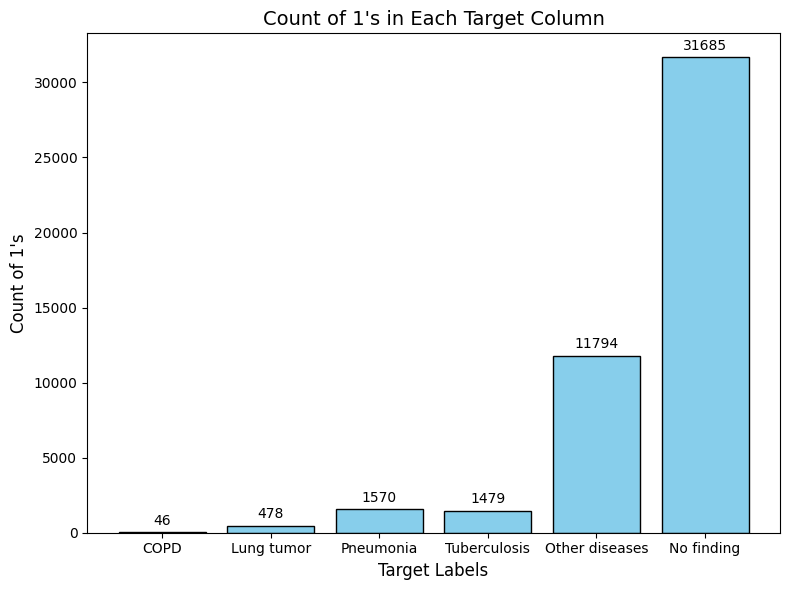

In [26]:
# Data for the bar graph
target_counts = {
    "COPD": 46,
    "Lung tumor": 478,
    "Pneumonia": 1570,
    "Tuberculosis": 1479,
    "Other diseases": 11794,
    "No finding": 31685,
}

# Extract keys (labels) and values (counts)
labels = list(target_counts.keys())
counts = list(target_counts.values())

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Count of 1's in Each Target Column", fontsize=14)
plt.xlabel("Target Labels", fontsize=12)
plt.ylabel("Count of 1's", fontsize=12)

# Add value annotations on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 500, str(count), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Preparing labels

## For Training

In [29]:
# Define target columns
target_columns = ["COPD", "Lung tumor", "Pneumonia", "Tuberculosis", "Other diseases", "No finding"]

In [30]:
train_labels.shape

(45000, 30)

In [32]:
# Separate features and target labels from train_labels
X = train_labels.drop(columns=target_columns + ["image_id", "rad_id"])
y = train_labels[target_columns]

In [33]:
X.shape

(45000, 22)

In [34]:
y.shape

(45000, 6)

In [47]:
# Splitting train_labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(36000, 22)

In [49]:
X_val.shape

(9000, 22)

In [50]:
y_train.shape

(36000, 6)

In [51]:
y_val.shape

(9000, 6)

## For Testing

In [52]:
test_labels.shape

(3000, 29)

In [53]:
# Renaming test_labels column to make it according to train_labels column
test_labels = test_labels.rename(columns={"Other disease": "Other diseases"})

In [54]:
# Removing image_id column from test_labels
X_test = test_labels.drop(columns=target_columns + ["image_id"])
y_test = test_labels[target_columns]

In [55]:
X_test.shape

(3000, 22)

In [56]:
y_test.shape

(3000, 6)

# Checking for Multi-label Cases

In [46]:
multi_label_rows_train = y_train.sum(axis=1) > 1
multi_label_rows_test = y_test.sum(axis=1) > 1
print(f"Number of multi-label rows in training data: {multi_label_rows_train.sum()}")
print(f"Number of multi-label rows in testing data: {multi_label_rows_test.sum()}")

Number of multi-label rows in training data: 1580
Number of multi-label rows in testing data: 409


# Multi-label Classification using Problem Transformation Approach

In [59]:
!pip install scikit-multilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.7 MB/s eta 0:00:00


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset
from sklearn.metrics import classification_report, accuracy_score

In [57]:
from sklearn.multioutput import MultiOutputClassifier

In [80]:
# Define models for each approach
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(eval_metric='logloss', random_state=42)

# Dictionary for models
models = {
    "Logistic Regression": logistic_regression,
    "Random Forest": random_forest,
    "XGBoost": xgboost,
}

# Function to evaluate the model
def evaluate_model(y_true, y_pred, model_name, dataset_name="Validation"):
    print(f"\nEvaluation for {model_name} on {dataset_name} Data")
    print(classification_report(y_true, y_pred))
    print("Accuracy Score:", accuracy_score(y_true, y_pred))

In [68]:
X.train = np.array(X_train)
y.train = np.array(y_train)
X.val = np.array(X_val)
y.val = np.array(y_val)
X.test = np.array(X_test)
y.test = np.array(y_test)

## Binary Relevance
This is the simplest technique, which basically treats each label as a separate single class classification problem.

In [81]:
print("### Binary Relevance ###")
for name, model in models.items():
    binary_relevance = BinaryRelevance(model)
    binary_relevance.fit(X_train, y_train)

    # Validation evaluation
    y_val_pred = binary_relevance.predict(X_val).toarray()
    evaluate_model(y_val, y_val_pred, f"Binary Relevance ({name})", dataset_name="Validation")

    # Test evaluation
    y_test_pred = binary_relevance.predict(X_test).toarray()
    evaluate_model(y_test, y_test_pred, f"Binary Relevance ({name})", dataset_name="Test")

### Binary Relevance ###


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has fe


Evaluation for Binary Relevance (Logistic Regression) on Validation Data
              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.67      0.19      0.29        96
           2       0.77      0.47      0.58       301
           3       0.68      0.38      0.49       314
           4       0.94      0.89      0.91      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.97      0.92      0.95      9418
   macro avg       0.73      0.51      0.57      9418
weighted avg       0.96      0.92      0.94      9418
 samples avg       0.95      0.94      0.94      9418

Accuracy Score: 0.9152222222222223

Evaluation for Binary Relevance (Logistic Regression) on Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.03      0.05        80
           2       0.85      0.34      0.48       246
         

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: U


Evaluation for Binary Relevance (Random Forest) on Validation Data
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.50      0.21      0.29        96
           2       0.74      0.72      0.73       301
           3       0.66      0.37      0.47       314
           4       0.93      0.98      0.95      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.96      0.96      0.96      9418
   macro avg       0.76      0.66      0.69      9418
weighted avg       0.96      0.96      0.95      9418
 samples avg       0.97      0.97      0.97      9418

Accuracy Score: 0.9386666666666666

Evaluation for Binary Relevance (Random Forest) on Test Data
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.42      0.10      0.16        80
           2       0.83      0.47      0.60       246
           3       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation for Binary Relevance (XGBoost) on Validation Data
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.53      0.21      0.30        96
           2       0.74      0.71      0.72       301
           3       0.65      0.33      0.44       314
           4       0.93      0.97      0.95      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.96      0.95      0.96      9418
   macro avg       0.76      0.67      0.69      9418
weighted avg       0.96      0.95      0.95      9418
 samples avg       0.97      0.97      0.97      9418

Accuracy Score: 0.9384444444444444

Evaluation for Binary Relevance (XGBoost) on Test Data
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.31      0.05      0.09        80
           2       0.82      0.46      0.59       246
           3       0.72      0.29

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Classifier Chains
In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.  

In [74]:
# Dictionary for modelss
modelss = {
    "Logistic Regression": logistic_regression,
    "Random Forest": random_forest,
}

In [82]:
print("\n### Classifier Chains ###")
for name, model in modelss.items():
    classifier_chain = ClassifierChain(model)
    classifier_chain.fit(X_train, y_train)

    # Validation evaluation
    y_val_pred = classifier_chain.predict(X_val)
    evaluate_model(y_val, y_val_pred, f"Classifier Chains ({name})", dataset_name="Validation")

    # Test evaluation
    y_test_pred = classifier_chain.predict(X_test)
    evaluate_model(y_test, y_test_pred, f"Classifier Chains ({name})", dataset_name="Test")


### Classifier Chains ###

Evaluation for Classifier Chains (Logistic Regression) on Validation Data
              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.67      0.19      0.29        96
           2       0.74      0.46      0.57       301
           3       0.70      0.40      0.51       314
           4       0.93      0.92      0.93      2421
           5       0.98      1.00      0.99      6277

   micro avg       0.95      0.93      0.94      9418
   macro avg       0.72      0.51      0.58      9418
weighted avg       0.94      0.93      0.93      9418
 samples avg       0.96      0.95      0.95      9418

Accuracy Score: 0.9244444444444444

Evaluation for Classifier Chains (Logistic Regression) on Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.03      0.05        80
           2       0.83      0.32 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_


Evaluation for Classifier Chains (Random Forest) on Validation Data
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.49      0.20      0.28        96
           2       0.73      0.72      0.73       301
           3       0.68      0.35      0.46       314
           4       0.93      0.96      0.95      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.97      0.95      0.96      9418
   macro avg       0.76      0.65      0.69      9418
weighted avg       0.96      0.95      0.95      9418
 samples avg       0.97      0.97      0.97      9418

Accuracy Score: 0.9394444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation for Classifier Chains (Random Forest) on Test Data
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.11      0.18        80
           2       0.84      0.46      0.59       246
           3       0.75      0.31      0.44       164
           4       0.76      0.96      0.85       657
           5       1.00      1.00      1.00      2051

   micro avg       0.92      0.89      0.91      3200
   macro avg       0.72      0.56      0.59      3200
weighted avg       0.91      0.89      0.89      3200
 samples avg       0.93      0.92      0.92      3200

Accuracy Score: 0.882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Label Powerset
In this, we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

In [83]:
print("\n### Label Powerset ###")
for name, model in models.items():
    label_powerset = LabelPowerset(model)
    label_powerset.fit(X_train, y_train)

    # Validation evaluation
    y_val_pred = label_powerset.predict(X_val).toarray()
    evaluate_model(y_val, y_val_pred, f"Label Powerset ({name})", dataset_name="Validation")

    # Test evaluation
    y_test_pred = label_powerset.predict(X_test).toarray()
    evaluate_model(y_test, y_test_pred, f"Label Powerset ({name})", dataset_name="Test")


### Label Powerset ###


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



Evaluation for Label Powerset (Logistic Regression) on Validation Data
              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.62      0.10      0.18        96
           2       0.80      0.54      0.65       301
           3       0.69      0.35      0.46       314
           4       0.94      0.97      0.95      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.97      0.94      0.96      9418
   macro avg       0.84      0.51      0.57      9418
weighted avg       0.96      0.94      0.95      9418
 samples avg       0.98      0.96      0.97      9418

Accuracy Score: 0.9392222222222222

Evaluation for Label Powerset (Logistic Regression) on Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.03      0.05        80
           2       0.81      0.32      0.46       246
           3 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Evaluation for Label Powerset (Random Forest) on Validation Data
              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.47      0.17      0.25        96
           2       0.75      0.71      0.73       301
           3       0.69      0.32      0.44       314
           4       0.93      0.96      0.95      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.97      0.95      0.96      9418
   macro avg       0.77      0.58      0.64      9418
weighted avg       0.96      0.95      0.95      9418
 samples avg       0.97      0.97      0.97      9418

Accuracy Score: 0.9401111111111111

Evaluation for Label Powerset (Random Forest) on Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.47      0.10      0.16        80
           2       0.85      0.43      0.58       246
           3       0.83  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U


Evaluation for Label Powerset (XGBoost) on Validation Data
              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.61      0.18      0.27        96
           2       0.75      0.70      0.72       301
           3       0.65      0.32      0.43       314
           4       0.93      0.97      0.95      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.97      0.95      0.96      9418
   macro avg       0.79      0.66      0.69      9418
weighted avg       0.96      0.95      0.95      9418
 samples avg       0.97      0.97      0.97      9418

Accuracy Score: 0.9413333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation for Label Powerset (XGBoost) on Test Data
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.33      0.10      0.15        80
           2       0.84      0.43      0.57       246
           3       0.76      0.27      0.40       164
           4       0.76      0.96      0.85       657
           5       1.00      1.00      1.00      2051

   micro avg       0.92      0.89      0.90      3200
   macro avg       0.78      0.54      0.61      3200
weighted avg       0.91      0.89      0.88      3200
 samples avg       0.93      0.92      0.92      3200

Accuracy Score: 0.8793333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Multi-label Classification using Ensemble Models: Random Forest and XGBoost

In [84]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [85]:
# Define ensemble models
random_forest_en = RandomForestClassifier(random_state=42)
xgboost_en = XGBClassifier(eval_metric='logloss', random_state=42)

# Dictionary for ensemble models
ensemble_models = {
    "Random Forest": random_forest_en,
    "XGBoost": xgboost_en,
}

In [86]:
# Train and evaluate the models
for name, model in ensemble_models.items():
    print(f"\n### {name} ###")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    print(f"\nValidation Results for {name}")
    print(classification_report(y_val, y_val_pred))
    print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    print(f"\nTest Results for {name}")
    print(classification_report(y_test, y_test_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


### Random Forest ###

Validation Results for Random Forest
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.47      0.18      0.26        96
           2       0.74      0.72      0.73       301
           3       0.67      0.35      0.46       314
           4       0.92      0.98      0.95      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.96      0.95      0.96      9418
   macro avg       0.78      0.65      0.69      9418
weighted avg       0.96      0.95      0.95      9418
 samples avg       0.97      0.97      0.97      9418

Validation Accuracy: 0.9385555555555556

Test Results for Random Forest
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.47      0.10      0.16        80
           2       0.83      0.45      0.59       246
           3       0.80      0.27      0.41       164

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Validation Results for XGBoost
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.66      0.22      0.33        96
           2       0.74      0.71      0.73       301
           3       0.67      0.36      0.47       314
           4       0.93      0.97      0.95      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.96      0.95      0.96      9418
   macro avg       0.81      0.67      0.72      9418
weighted avg       0.96      0.95      0.95      9418
 samples avg       0.97      0.97      0.97      9418

Validation Accuracy: 0.9395555555555556

Test Results for XGBoost
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.31      0.05      0.09        80
           2       0.84      0.46      0.59       246
           3       0.68      0.30      0.42       164
           4       0.75      0.98 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Training a Random Forest Model using MultiOutputClassifier()

In [ ]:
# Multi-Label Classification using RandomForest
model = RandomForestClassifier(random_state=42)
multi_label_model = MultiOutputClassifier(model)

# Train the model
multi_label_model.fit(X_train, y_train)

# Make predictions
y_pred = multi_label_model.predict(X_test)

# Evaluate the model
print("Classification Report (Multi-Label):")
print(classification_report(y_test, y_pred, target_names=target_columns))

Classification Report (Multi-Label):
                precision    recall  f1-score   support

          COPD       0.75      0.67      0.71         9
    Lung tumor       0.50      0.21      0.29        96
     Pneumonia       0.74      0.72      0.73       301
  Tuberculosis       0.66      0.37      0.47       314
Other diseases       0.93      0.98      0.95      2421
    No finding       1.00      1.00      1.00      6277

     micro avg       0.96      0.96      0.96      9418
     macro avg       0.76      0.66      0.69      9418
  weighted avg       0.96      0.96      0.95      9418
   samples avg       0.97      0.97      0.97      9418



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8793333333333333


In [ ]:
# Make predictions
y_pred_labels = multi_label_model.predict(X_test)

# Evaluate the model
print("Classification Report (Multi-Label):")
print(classification_report(y_test, y_pred_labels, target_names=target_columns))

Classification Report (Multi-Label):
                precision    recall  f1-score   support

          COPD       0.50      0.50      0.50         2
    Lung tumor       0.42      0.10      0.16        80
     Pneumonia       0.83      0.47      0.60       246
  Tuberculosis       0.77      0.28      0.41       164
Other diseases       0.75      0.98      0.85       657
    No finding       1.00      1.00      1.00      2051

     micro avg       0.92      0.90      0.91      3200
     macro avg       0.71      0.55      0.59      3200
  weighted avg       0.91      0.90      0.89      3200
   samples avg       0.93      0.92      0.92      3200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Training a Neural Network Model for Multi-label Classification

In [ ]:
# Calculate class weights based on the provided counts of 1's for each target column
class_counts = {
    "COPD": 46,
    "Lung tumor": 478,
    "Pneumonia": 1570,
    "Tuberculosis": 1479,
    "Other diseases": 11794,
    "No finding": 31685,
}

# Calculate class weights: {class: weight}
class_weights = {i: sum(class_counts.values()) / (len(class_counts) * count) for i, count in enumerate(class_counts.values())}

# Build the Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(len(target_columns), activation='sigmoid'))  # Output layer with sigmoid activation

# Compile the model with binary crossentropy loss and AUC as a metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# Train the model with class weights for each label
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.5710 - loss: 0.5782 - val_AUC: 0.9913 - val_loss: 0.1683
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9927 - loss: 0.3203 - val_AUC: 0.9934 - val_loss: 0.1062
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9942 - loss: 0.2714 - val_AUC: 0.9932 - val_loss: 0.1041
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9944 - loss: 0.2582 - val_AUC: 0.9944 - val_loss: 0.0866
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9949 - loss: 0.2548 - val_AUC: 0.9946 - val_loss: 0.0827
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9946 - loss: 0.2733 - val_AUC: 0.9932 - val_loss: 0.0912
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9949 - loss: 0.2528 - val_AUC: 0.9944 - val_loss: 0.0887
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9950 - loss: 0.2467 - val_AUC: 0.9955 - val_loss: 0.0714
Epoch 9/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st

In [ ]:
# Evaluate the model on the test set
loss, auc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test AUC: {auc}")

# Make predictions on the test set
y_pred_NN = model.predict(X_test)
y_pred_binary_NN = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
print("Classification Report (Multi-Label):")
print(classification_report(y_test, y_pred_binary_NN, target_names=target_columns))

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9949 - loss: 0.0720
Test Loss: 0.0712677612900734, Test AUC: 0.9949616193771362
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report (Multi-Label):
                precision    recall  f1-score   support

          COPD       0.75      0.67      0.71         9
    Lung tumor       0.50      0.21      0.29        96
     Pneumonia       0.74      0.72      0.73       301
  Tuberculosis       0.66      0.37      0.47       314
Other diseases       0.93      0.98      0.95      2421
    No finding       1.00      1.00      1.00      6277

     micro avg       0.96      0.96      0.96      9418
     macro avg       0.76      0.66      0.69      9418
  weighted avg       0.96      0.96      0.95      9418
   samples avg       0.97      0.97      0.97      9418



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate the model on the test set
loss, auc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test AUC: {auc}")

# Make predictions on the test set
y_pred_NN_testlabels = model.predict(X_test)
y_pred_binary_NN_testlabels = (y_pred_NN_testlabels > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
print("Classification Report (Multi-Label):")
print(classification_report(y_test, y_pred_binary_NN_testlabels, target_names=target_columns))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9544 - loss: 0.2156
Test Loss: 0.10471687465906143, Test AUC: 0.9874153733253479
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report (Multi-Label):
                precision    recall  f1-score   support

          COPD       0.11      0.50      0.18         2
    Lung tumor       0.37      0.46      0.41        80
     Pneumonia       0.72      0.65      0.68       246
  Tuberculosis       0.54      0.50      0.52       164
Other diseases       0.65      0.40      0.49       657
    No finding       1.00      1.00      1.00      2051

     micro avg       0.88      0.81      0.85      3200
     macro avg       0.57      0.58      0.55      3200
  weighted avg       0.87      0.81      0.83      3200
   samples avg       0.82      0.83      0.82      3200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
data = train_labels.copy()

# Verify that each image_id has exactly three rows
image_counts = data['image_id'].value_counts()
if not all(image_counts == 3):
    raise ValueError("Each image_id must have exactly three rows.")

# Create a unique index for each row within an image_id
data['row_index'] = data.groupby('image_id').cumcount()

# Split the dataset into three subsets based on row_index
dataset_0 = data[data['row_index'] == 0].reset_index(drop=True)  # First rad_id for each image
dataset_1 = data[data['row_index'] == 1].reset_index(drop=True)  # Second rad_id for each image
dataset_2 = data[data['row_index'] == 2].reset_index(drop=True)  # Third rad_id for each image

# Drop the row_index column if no longer needed
dataset_0 = dataset_0.drop(columns=['row_index'])
dataset_1 = dataset_1.drop(columns=['row_index'])
dataset_2 = dataset_2.drop(columns=['row_index'])

# Display results
print("Dataset 0 (First rad_id per image):")
print(dataset_0.info())

print("\nDataset 1 (Second rad_id per image):")
print(dataset_1.info())

print("\nDataset 2 (Third rad_id per image):")
print(dataset_2.info())

Dataset 0 (First rad_id per image):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_id            15000 non-null  object
 1   rad_id              15000 non-null  object
 2   Aortic enlargement  15000 non-null  int64 
 3   Atelectasis         15000 non-null  int64 
 4   Calcification       15000 non-null  int64 
 5   Cardiomegaly        15000 non-null  int64 
 6   Clavicle fracture   15000 non-null  int64 
 7   Consolidation       15000 non-null  int64 
 8   Edema               15000 non-null  int64 
 9   Emphysema           15000 non-null  int64 
 10  Enlarged PA         15000 non-null  int64 
 11  ILD                 15000 non-null  int64 
 12  Infiltration        15000 non-null  int64 
 13  Lung Opacity        15000 non-null  int64 
 14  Lung cavity         15000 non-null  int64 
 15  Lung cyst           15000 non-null

In [ ]:
# Function to train and evaluate a multi-label Random Forest on a dataset
def train_multilabel_rf(dataset, feature_columns, target_columns):
    # Split dataset into features (X) and targets (y)
    X = dataset[feature_columns]
    y = dataset[target_columns]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Classifier with MultiOutput support
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    multi_rf = MultiOutputClassifier(rf)

    # Train the model
    multi_rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = multi_rf.predict(X_test)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_columns))

    # Return the trained model
    return multi_rf

In [ ]:
# Define target columns
target_columns = ["COPD", "Lung tumor", "Pneumonia", "Tuberculosis", "Other diseases", "No finding"]
columns_to_drop = target_columns + ["image_id", "rad_id", "row_index"]

feature_columns = [col for col in data.columns if col not in columns_to_drop]

print("Training on Dataset 0:")
rf_model_0 = train_multilabel_rf(dataset_0, feature_columns, target_columns)

print("\nTraining on Dataset 1:")
rf_model_1 = train_multilabel_rf(dataset_1, feature_columns, target_columns)

print("\nTraining on Dataset 2:")
rf_model_2 = train_multilabel_rf(dataset_2, feature_columns, target_columns)

Training on Dataset 0:
Classification Report:
                precision    recall  f1-score   support

          COPD       0.00      0.00      0.00         1
    Lung tumor       0.67      0.19      0.30        21
     Pneumonia       0.73      0.64      0.68        77
  Tuberculosis       0.57      0.29      0.38        83
Other diseases       0.95      0.99      0.97       830
    No finding       1.00      1.00      1.00      2109

     micro avg       0.97      0.96      0.97      3121
     macro avg       0.65      0.52      0.55      3121
  weighted avg       0.97      0.96      0.96      3121
   samples avg       0.98      0.97      0.97      3121


Training on Dataset 1:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                precision    recall  f1-score   support

          COPD       0.00      0.00      0.00         0
    Lung tumor       0.47      0.45      0.46        33
     Pneumonia       0.88      0.93      0.90       114
  Tuberculosis       0.64      0.42      0.51       102
Other diseases       0.93      0.97      0.95       774
    No finding       1.00      1.00      1.00      2107

     micro avg       0.96      0.97      0.97      3130
     macro avg       0.65      0.63      0.64      3130
  weighted avg       0.96      0.97      0.96      3130
   samples avg       0.97      0.97      0.97      3130


Training on Dataset 2:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                precision    recall  f1-score   support

          COPD       0.50      0.50      0.50         2
    Lung tumor       0.62      0.17      0.27        47
     Pneumonia       0.81      0.68      0.74       116
  Tuberculosis       0.67      0.43      0.52       103
Other diseases       0.91      0.96      0.93       770
    No finding       1.00      1.00      1.00      2105

     micro avg       0.96      0.95      0.95      3143
     macro avg       0.75      0.62      0.66      3143
  weighted avg       0.95      0.95      0.95      3143
   samples avg       0.97      0.96      0.96      3143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predict on the test set
y_pred_rf_0 = rf_model_0.predict(X_test)
y_pred_rf_1 = rf_model_1.predict(X_test)
y_pred_rf_2 = rf_model_2.predict(X_test)

accuracy_0 = accuracy_score(y_test, y_pred_rf_0)
print(f"Overall Accuracy for dataset 0: {accuracy_0:.4f}")
# Print classification report
print("Classification Report for dataset 0:")
print(classification_report(y_test, y_pred_rf_0, target_names=target_columns))

accuracy_1 = accuracy_score(y_test, y_pred_rf_1)
print(f"Overall Accuracy for dataset 0: {accuracy_1:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_1, target_names=target_columns))

accuracy_2 = accuracy_score(y_test, y_pred_rf_2)
print(f"Overall Accuracy for dataset 0: {accuracy_2:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_2, target_names=target_columns))

Overall Accuracy for dataset 0: 0.8657
Classification Report for dataset 0:
                precision    recall  f1-score   support

          COPD       1.00      0.50      0.67         2
    Lung tumor       1.00      0.01      0.02        80
     Pneumonia       0.83      0.32      0.46       246
  Tuberculosis       0.49      0.27      0.35       164
Other diseases       0.74      0.99      0.85       657
    No finding       1.00      1.00      1.00      2051

     micro avg       0.91      0.88      0.90      3200
     macro avg       0.84      0.51      0.56      3200
  weighted avg       0.91      0.88      0.87      3200
   samples avg       0.92      0.91      0.91      3200

Overall Accuracy for dataset 0: 0.8717
Classification Report:
                precision    recall  f1-score   support

          COPD       0.33      0.50      0.40         2
    Lung tumor       0.35      0.35      0.35        80
     Pneumonia       0.73      0.55      0.63       246
  Tuberculosis    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
